In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | talnakh
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | mamallapuram
Processing Record 5 of Set 13 | mahebourg
Processing Record 6 of Set 13 | hun
Processing Record 7 of Set 13 | qaanaaq
Processing Record 8 of Set 13 | cap-aux-meules
Processing Record 9 of Set 13 | hit
Processing Record 10 of Set 13 | busselton
Processing Record 11 of Set 13 | pacific grove
Processing Record 12 of Set 13 | puerto ayora
Processing Record 13 of Set 13 | nam tha
City not found. Skipping...
Processing Record 14 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 13 | clyde river
Processing Record 16 of Set 13 | salme
Processing Record 17 of Set 13 | east london
Processing Record 18 of Set 13 | ekhabi
Processing Record 19 of Set 13 | codrington
Processing Record 20 of Set 13 | pisco
Processing Record 21 of Set 13 | ratnapura
Pro

Processing Record 35 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 16 | kavaratti
Processing Record 37 of Set 16 | darnah
Processing Record 38 of Set 16 | thompson
Processing Record 39 of Set 16 | kavieng
Processing Record 40 of Set 16 | maniitsoq
Processing Record 41 of Set 16 | tlatenchi
Processing Record 42 of Set 16 | osoyoos
Processing Record 43 of Set 16 | jalu
Processing Record 44 of Set 16 | bambous virieux
Processing Record 45 of Set 16 | faya
Processing Record 46 of Set 16 | san quintin
Processing Record 47 of Set 16 | broome
Processing Record 48 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 16 | korla
Processing Record 50 of Set 16 | sao geraldo do araguaia
Processing Record 1 of Set 17 | sironj
Processing Record 2 of Set 17 | khatanga
Processing Record 3 of Set 17 | russellville
Processing Record 4 of Set 17 | pochutla
Processing Record 5 of Set 17 | dunedin
Processing Record 6 of Set 17 | erenhot
Processi

Processing Record 23 of Set 20 | beloha
Processing Record 24 of Set 20 | teahupoo
Processing Record 25 of Set 20 | alto paraguai
Processing Record 26 of Set 20 | reconquista
Processing Record 27 of Set 20 | nanakuli
Processing Record 28 of Set 20 | iqaluit
Processing Record 29 of Set 20 | tazovskiy
Processing Record 30 of Set 20 | amahai
Processing Record 31 of Set 20 | ardmore
Processing Record 32 of Set 20 | zhezkazgan
Processing Record 33 of Set 20 | verkhoyansk
Processing Record 34 of Set 20 | kulunda
Processing Record 35 of Set 20 | smithers
Processing Record 36 of Set 20 | kenai
Processing Record 37 of Set 20 | bubaque
Processing Record 38 of Set 20 | charters towers
Processing Record 39 of Set 20 | lata
Processing Record 40 of Set 20 | inhambane
Processing Record 41 of Set 20 | araouane
Processing Record 42 of Set 20 | airai
Processing Record 43 of Set 20 | laureles
Processing Record 44 of Set 20 | bowen
Processing Record 45 of Set 20 | waw
Processing Record 46 of Set 20 | klyuc

City not found. Skipping...
Processing Record 14 of Set 24 | itabera
Processing Record 15 of Set 24 | berlevag
Processing Record 16 of Set 24 | marienburg
Processing Record 17 of Set 24 | huanren
Processing Record 18 of Set 24 | alta floresta
Processing Record 19 of Set 24 | bireun
Processing Record 20 of Set 24 | kahului
Processing Record 21 of Set 24 | muros
Processing Record 22 of Set 24 | camacha
Processing Record 23 of Set 24 | simao
Processing Record 24 of Set 24 | oktyabrskiy
Processing Record 25 of Set 24 | linxi
Processing Record 26 of Set 24 | zhob
Processing Record 27 of Set 24 | hibbing
Processing Record 28 of Set 24 | saint-francois
Processing Record 29 of Set 24 | flinders
Processing Record 30 of Set 24 | hihifo
City not found. Skipping...
Processing Record 31 of Set 24 | mayo
Processing Record 32 of Set 24 | jilib
Processing Record 33 of Set 24 | lircay
Processing Record 34 of Set 24 | hangu
Processing Record 35 of Set 24 | ipora
Processing Record 36 of Set 24 | arlit
Pr

In [7]:
len(city_data)

599

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,48.76,68,92,6.93,AR,2021-10-17 16:30:45
1,Talnakh,69.4865,88.3972,33.84,100,100,6.26,RU,2021-10-17 16:31:07
2,Mataura,-46.1927,168.8643,47.52,97,100,1.34,NZ,2021-10-17 16:31:08
3,Mamallapuram,12.6264,80.1722,84.42,76,99,4.83,IN,2021-10-17 16:31:09
4,Mahebourg,-20.4081,57.7000,75.25,77,30,16.42,MU,2021-10-17 16:31:09
5,Hun,29.1268,15.9477,78.13,26,32,13.51,LY,2021-10-17 16:31:10
6,Qaanaaq,77.4840,-69.3632,24.87,89,100,10.11,GL,2021-10-17 16:31:10
7,Cap-Aux-Meules,47.3821,-61.8597,57.49,84,97,25.48,CA,2021-10-17 16:31:11
8,Hit,33.6416,42.8251,78.69,28,72,6.33,IQ,2021-10-17 16:31:11
9,Busselton,-33.6500,115.3333,51.04,79,18,7.61,AU,2021-10-17 16:31:12


In [9]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-17 16:30:45,-54.8000,-68.3000,48.76,68,92,6.93
1,Talnakh,RU,2021-10-17 16:31:07,69.4865,88.3972,33.84,100,100,6.26
2,Mataura,NZ,2021-10-17 16:31:08,-46.1927,168.8643,47.52,97,100,1.34
3,Mamallapuram,IN,2021-10-17 16:31:09,12.6264,80.1722,84.42,76,99,4.83
4,Mahebourg,MU,2021-10-17 16:31:09,-20.4081,57.7000,75.25,77,30,16.42


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

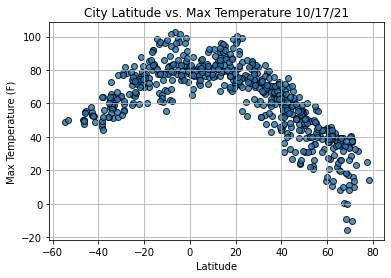

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

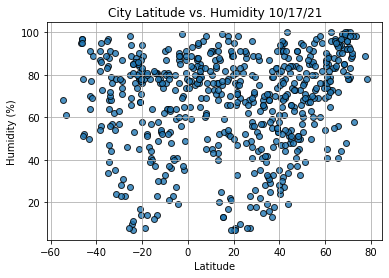

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

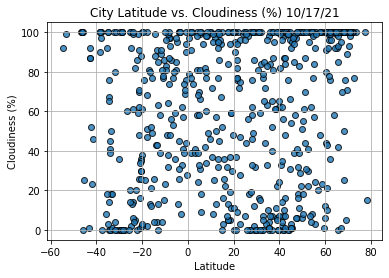

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

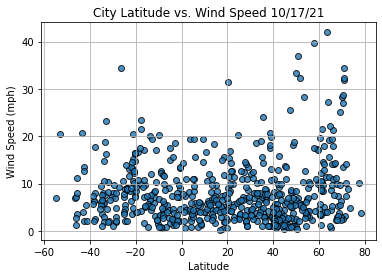

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Salme
Country                        NP
Date          2021-10-17 16:31:14
Lat                       28.0369
Lng                       85.0942
Max Temp                     62.8
Humidity                       80
Cloudiness                     76
Wind Speed                   3.15
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

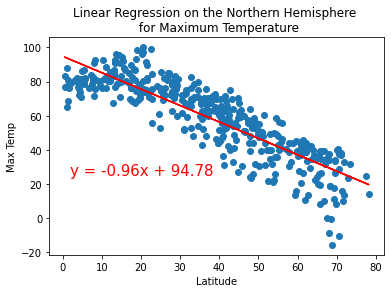

LinregressResult(slope=-0.9611083897075297, intercept=94.77526302805778, rvalue=-0.8663209233323157, pvalue=7.31979493441367e-124, stderr=0.027569428484365804, intercept_stderr=1.174015042808989)

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(2,25))
linregress(x_values, y_values)

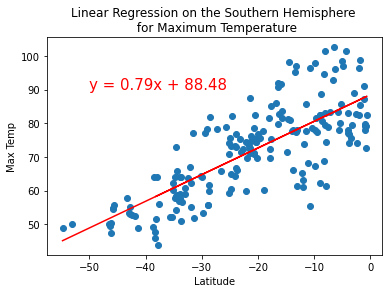

LinregressResult(slope=0.7918981014765794, intercept=88.48378623503893, rvalue=0.7682637690066455, pvalue=7.438070858364935e-39, stderr=0.04774333578334678, intercept_stderr=1.1706792893656037)

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
linregress(x_values, y_values)

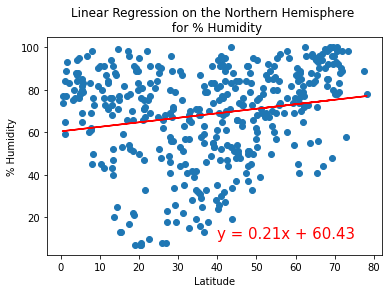

LinregressResult(slope=0.21253419792686973, intercept=60.429982105001095, rvalue=0.1896148181849375, pvalue=0.00012115400076912113, stderr=0.05475386641921009, intercept_stderr=2.331635669000532)

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

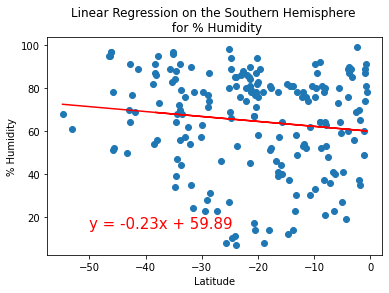

LinregressResult(slope=-0.22928345146665347, intercept=59.89289967678423, rvalue=-0.12756496724350094, pvalue=0.07707650648334975, stderr=0.1289917516885672, intercept_stderr=3.162912053025606)

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

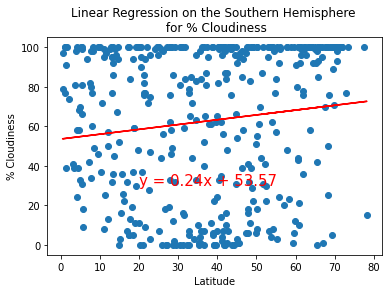

LinregressResult(slope=0.24384170470417, intercept=53.56846622945785, rvalue=0.12946332918864725, pvalue=0.009012748929036623, stderr=0.09291806028148993, intercept_stderr=3.9568176243103217)

In [52]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,30))
linregress(x_values, y_values)

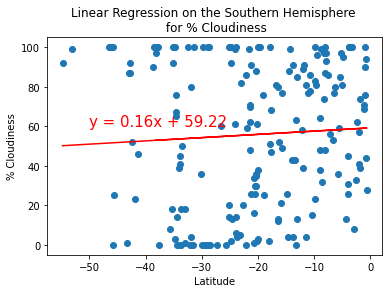

LinregressResult(slope=0.16486535333007382, intercept=59.221364799109914, rvalue=0.05858218355442048, pvalue=0.41836665235025394, stderr=0.20328281006623852, intercept_stderr=4.984548560002293)

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)

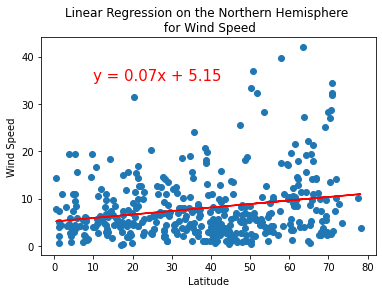

LinregressResult(slope=0.07399298658170571, intercept=5.150031825348233, rvalue=0.21475983770552698, pvalue=1.2713206016943876e-05, stderr=0.01674145778106746, intercept_stderr=0.7129173274183279)

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,35))
linregress(x_values, y_values)

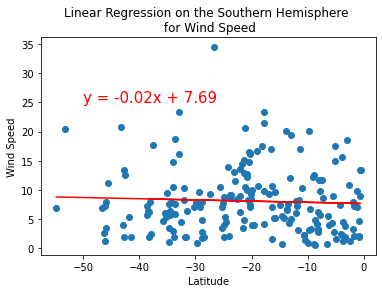

LinregressResult(slope=-0.020447455050718884, intercept=7.686920261870372, rvalue=-0.04750174499682974, pvalue=0.5118248165469814, stderr=0.031111610033787086, intercept_stderr=0.7628649512604397)

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))
linregress(x_values, y_values)